In [ ]:
"""
Sieci neuronowe
Laboratorium 13
Zbiór danych MNIST składa się z 70 000 rysunków zawierających cyfry odręcznie napisane przez uczniów szkół średnich i pracowników 
Biura Spisu Ludności. Każdy rysunek zawiera etykietę określającą zawartą na nim cyfrę. 
Zbiór treningowy składa się z 60 000 obrazów, a zbiór testowy z 10 000 obrazów. 
Każdy obraz ma rozmiar 28x28 pikseli, a każda cecha opisuje natężenie szarości danego piksela 
i przyjmnuje wartość od 0 (biel) do 255 (czerń). Należy zbudować i porównać modele MLP i CNN do klasyfikacji obrazów MNIST.
Zbiór danych MNIST można wczytać korzystając z keras.datasets (from keras.datasets import mnist)
"""

In [ ]:
"""
1.Przygotowanie danych.
1.1. Wczytanie zbioru danych.
1.2. Należy wyodrębnić co najmniej 5000 obrazów ze zbioru treningowego do walidacji.
1.3. Sprawdzenie wymiarów i typów danych tworzących poszczególne zestawy danych.
1.4. Wyświetlenie kilkunastu obrazów ze zbioru uczącego i sprawdzenie etykiety.
1.5. Normalizacja odcienia pikseli do zakresu [0,1].
"""

In [3]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

11490434/11490434 [==============================] - 3s 0us/step
Wymiary zbioru treningowego: (55000, 28, 28)
Wymiary zbioru walidacyjnego: (5000, 28, 28)
Wymiary zbioru testowego: (10000, 28, 28)
Typ danych obrazów: uint8
Typ danych etykiet: uint8


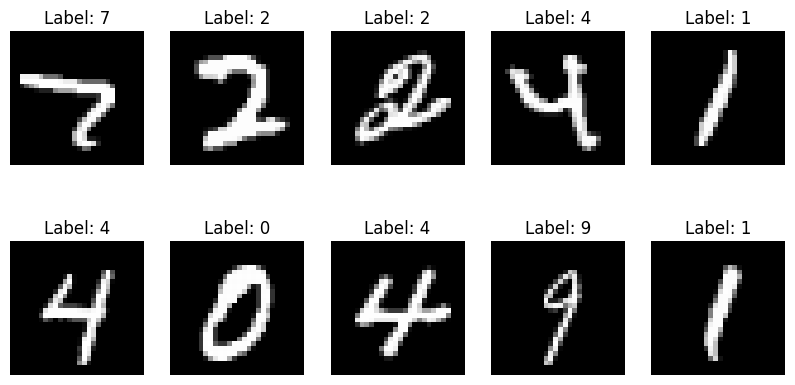

Przed normalizacją: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Po normalizacji: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [2]:
# 1.1 Wczytanie zbioru danych
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1.2 Wyodrębnienie 5000 obrazów ze zbioru treningowego do walidacji
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, random_state=42)

# 1.3 Sprawdzenie wymiarów i typów danych
print("Wymiary zbioru treningowego:", x_train.shape)
print("Wymiary zbioru walidacyjnego:", x_val.shape)
print("Wymiary zbioru testowego:", x_test.shape)
print("Typ danych obrazów:", x_train.dtype)
print("Typ danych etykiet:", y_train.dtype)

# 1.4 Wyświetlenie kilkunastu obrazów ze zbioru uczącego i sprawdzenie etykiety
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# 1.5 Normalizacja odcienia pikseli do zakresu [0,1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Sprawdzenie efektu normalizacji
print("Przed normalizacją:", x_train[0][0])
print("Po normalizacji:", x_train[0][0])

In [ ]:
"""2. Perceptron wielowarstwowy (ziarno losowości = 42):
2.1. Tworzenie perceptronu wielowarstwowego za pomocą interfejsu sekwencyjnego składającego się z:
	- jednej warstwy wejściowej (wymiary warstwy odnoszą się do wymiarów przykładów),  
	- warstwy spłaszczonej, 
	- jednej warstwy ukrytej gęstej składającej się z 128 neuronów, która korzysta z funkcji aktywacji ReLU, 
	- warstwy wyjściowej gęstej składająca się z 10 neuronów z wyznaczoną funkcją aktywacji softmax.
2.2. Dlaczego warstwa wyjściowa składa się z 10 neuronów?
2.3. Jaka jest liczba parametrów w poszczególnych warstwach modelu? Ile jest wag połączeń i członów obciążeń w poszczególnych warstwach modelu?
2.4. Jakie są wagi i obciążenia dla poszczególnych warstw?
2.5. Kompilowanie modelu:
	- funkcja straty: sparse_categorical_crossentropy, 
	- optymalizator: adam,
	- wskaźnik: accuracy.
2.6. Trenowanie modelu:
	- cechy wejściowe,
	- klasy docelowe (etykiety), 
	- liczba epok równa 50,
	- przebieg walidacyjny.
2.7. Krzywe uczenia (średnia funkcja straty uczenia i dokładność zmierzone w każdej epoce dla zestawu treningowego i walidacyjnego).
	2.7.1. Jak zmienia się dokładność dla zbioru uczącego i walidacyjnego w miarę uczenia?
	2.7.2. Jak na początku treningu sprawował się model?
	2.7.3. Jak zmienia się wartość błędu walidacyjnego?
	2.7.4. Czy model uzyskał zbieżność?

2.8. Ewaluacja modelu.
2.9. Predykcja modelu.
2.10. Raport z klasyfikacji, macierz błędów.
2.11. Funkcja straty dla zbioru walidacyjnego po pewnej liczbie epok przestaje maleć. Warto szybciej zakończyć etap uczenia. W tym celu należy wprawdzić callbacks, gdzie monitorowane będą zmiany funkcji straty dla zbioru walidacyjnego a liczba epok, po ilu zatrzyma się model to minimum 3 epoki. Należy przeprowadzić trening modelu przy ustawieniach z 2.6. + callbacks.
2.12. Ewaluacja modelu z 2.11.
2.13. Predykcja modelu z 2.11.
2.14. Raport z klasyfikacji, macierz błędów dla modelu z 2.11. Jaka jest dokładność modelu? Dla której klasy wskaźniki jakości klasyfikacji są najwyższe? Jaka jest liczba fałszywie pozytywnych i fałszywie negatywnych predykcji dla tej klasy? Dla której klasy wskaźniki jakości klasyfikacji są najniższe? Jaka jest liczba fałszywie pozytywnych i fałszywie negatywnych predykcji dla tej klasy?
2.15. Wyświetlenie kilkunastu obrazów z etykietami i predykcją etykiet ze zbioru testowego, które zostały nieprawidłowo sklasyfikowane."""

In [4]:
# Ustawienie ziarna losowości
np.random.seed(42)

# 2.1 Tworzenie perceptronu wielowarstwowego
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Warstwa wejściowa spłaszczająca obraz
model.add(Dense(128, activation='relu'))  # Warstwa ukryta gęsta z ReLU
model.add(Dense(10, activation='softmax'))  # Warstwa wyjściowa softmax

In [5]:
# 2.2 Warstwa wyjściowa składa się z 10 neuronów, ponieważ mamy 10 klas cyfr (0-9)

# 2.3 Liczba parametrów w poszczególnych warstwach
print("Liczba parametrów w poszczególnych warstwach:")
model.summary()

Liczba parametrów w poszczególnych warstwach:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 2.4 Wagi i obciążenia
print("Wagi i obciążenia dla poszczególnych warstw:")
for layer in model.layers:
    print(layer.get_weights())

Wagi i obciążenia dla poszczególnych warstw:
[]
[array([[ 0.07666124, -0.04426162,  0.02965391, ..., -0.06676351,
         0.02278158,  0.06148576],
       [ 0.02082729,  0.04184313,  0.01980383, ..., -0.06366561,
         0.04228248,  0.07440256],
       [ 0.0307682 ,  0.02695446, -0.07251329, ..., -0.07143125,
         0.07861558,  0.05787272],
       ...,
       [ 0.05656246, -0.02173677,  0.04743207, ...,  0.01523394,
        -0.00442535,  0.00396372],
       [-0.05080266, -0.04855805, -0.00574218, ...,  0.0363221 ,
         0.04601771, -0.07729959],
       [ 0.05308945,  0.03469784,  0.0080842 , ...,  0.04649974,
        -0.0491052 , -0.05476891]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.,

In [7]:
# 2.5 Kompilacja modelu
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# 2.6 Trenowanie modelu
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0893 - val_accuracy: 0.9778
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0859 - val_accuracy: 0.9808
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0854 - val_accuracy: 0.9800
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0943 - val_accuracy: 0.9800
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.1128 - val_accuracy: 0.9754
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1093 - val_accuracy: 0.9788
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0981 - val_accuracy:

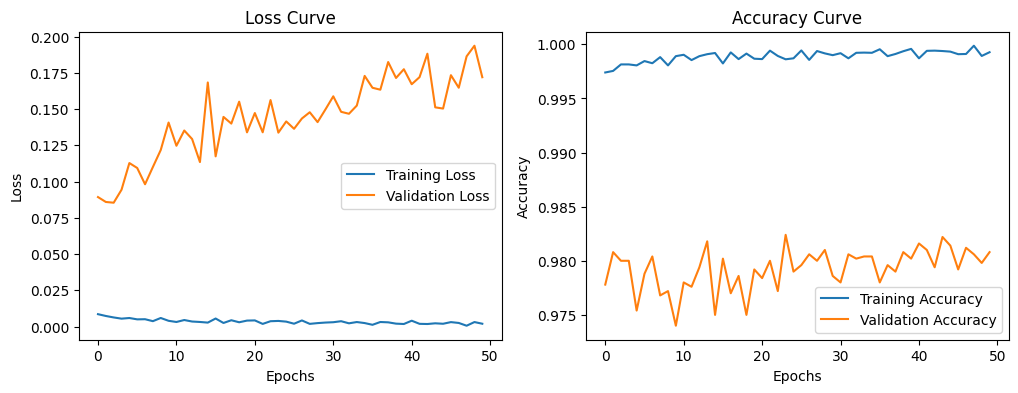

In [16]:
# 2.7 Krzywe uczenia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# 2.8 Ewaluacja modelu
eval_result = model.evaluate(x_test, y_test)
print("\nEwaluacja modelu:")
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

313/313 [==============================] - 2s 5ms/step - loss: 0.1889 - accuracy: 0.9781

Ewaluacja modelu:
Test Loss: 0.18890532851219177, Test Accuracy: 0.9781000018119812


In [18]:
# 2.9 Predykcja modelu
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [19]:
# 2.10 Raport z klasyfikacji i macierz błędów
y_pred = np.argmax(predictions, axis=1)
print("\nRaport z klasyfikacji:")
print(classification_report(y_test, y_pred))
print("\nMacierz błędów:")
print(confusion_matrix(y_test, y_pred))


Raport z klasyfikacji:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Macierz błędów:
[[ 974    1    0    0    2    0    1    0    2    0]
 [   0 1131    1    0    0    1    1    1    0    0]
 [   1    1 1013    0    3    0    1    7    5    1]
 [   0    0    8  986    0    2    0    4

In [20]:
# 2.11 Callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

# 2.12 Trenowanie modelu z callbacks
model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1973 - val_accuracy: 0.9798
Epoch 2/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1682 - val_accuracy: 0.9820
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.2034 - val_accuracy: 0.9786
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1670 - val_accuracy: 0.9812
Epoch 5/50
1719/1719 [==============================] - 8s 4ms/step - loss: 8.8421e-04 - accuracy: 0.9998 - val_loss: 0.1958 - val_accuracy: 0.9796
Epoch 6/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1747 - val_accuracy: 0.9802
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.2014 - val_accur

In [21]:
# 2.13 Ewaluacja modelu z callbacks
eval_result_callbacks = model.evaluate(x_test, y_test)
print("\nEwaluacja modelu z callbacks:")
print(f"Test Loss: {eval_result_callbacks[0]}, Test Accuracy: {eval_result_callbacks[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1938 - accuracy: 0.9788

Ewaluacja modelu z callbacks:
Test Loss: 0.19384779036045074, Test Accuracy: 0.9787999987602234


In [22]:
# 2.14 Raport z klasyfikacji i macierz błędów z callbacks
y_pred_callbacks = np.argmax(model.predict(x_test), axis=1)
print("\nRaport z klasyfikacji z callbacks:")
print(classification_report(y_test, y_pred_callbacks))

print("\nMacierz błędów z callbacks:")
print(confusion_matrix(y_test, y_pred_callbacks))

313/313 [==============================] - 1s 4ms/step

Raport z klasyfikacji z callbacks:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Macierz błędów z callbacks:
[[ 973    1    1    0    1    0    1    0    2    1]
 [   0 1128    1    1    0    0    2    1    2    0]
 [   2    3 100

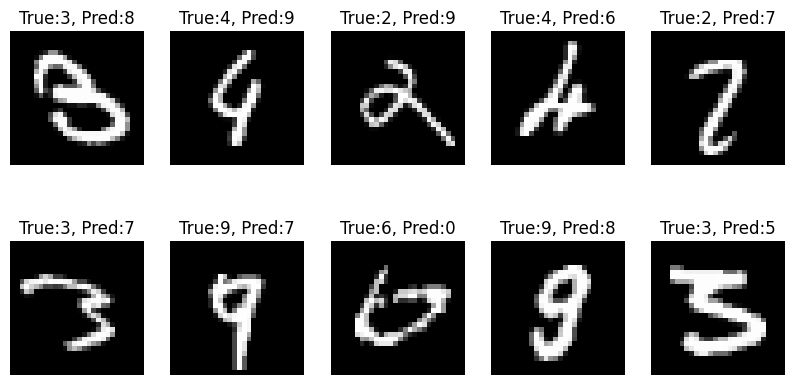

In [23]:
# 2.15 Nieprawidłowo sklasyfikowane obrazy ze zbioru testowego
misclassified_indices = np.where(y_pred_callbacks != y_test)[0]

plt.figure(figsize=(10, 5))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True:{y_test[index]}, Pred:{y_pred_callbacks[index]}")
    plt.axis('off')

plt.show()